In [290]:
# 한글 폰트
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import seaborn as sns

epl_df = pd.read_csv('combined file_1.csv')
epl_df

,Team,Rank,Point,Score,Lose_score,Balance(m),AverageAge,season
0,Arsenal FC,4,79,68,41,-37.10,26.5,2013-2014
1,Aston Villa,15,38,39,61,-11.74,24.4,2013-2014
2,Cardiff City,20,30,32,74,-42.08,25.2,2013-2014
3,Chelsea FC,3,82,71,27,-52.42,27.3,2013-2014
4,Crystal Palace,11,45,33,48,-33.00,27.7,2013-2014
...,...,...,...,...,...,...,...,...
195,Nottingham Forest,16,38,38,68,-190.25,26.5,2022-2023
196,Southampton FC,20,25,36,73,-146.61,24.6,2022-2023
197,Tottenham Hotspur,8,60,70,63,-139.15,27.1,2022-2023
198,West Ham United,14,40,42,55,-164.95,27.9,2022-2023


In [291]:
# 팀명 한글화
team_eng = ['Arsenal FC', 'Aston Villa', 'Cardiff City', 'Chelsea FC',
       'Crystal Palace', 'Everton FC', 'Fulham FC', 'Hull City',
       'Liverpool FC', 'Manchester City', 'Manchester United',
       'Newcastle United', 'Norwich City', 'Southampton FC', 'Stoke City',
       'Sunderland AFC', 'Swansea City', 'Tottenham Hotspur',
       'West Bromwich Albion', 'West Ham United', 'Burnley FC',
       'Leicester City', 'Queens Park Rangers', 'AFC Bournemouth',
       'Watford FC', 'Middlesbrough FC', 'Brighton & Hove Albion',
       'Huddersfield Town', 'Wolverhampton Wanderers', 'Sheffield United',
       'Leeds United', 'Brentford FC', 'Nottingham Forest']
team_kor = ['아스날','아스톤 빌라','카디프','첼시','크리스탈 팰리스','에버튼','풀럼','헐시티',
            '리버풀','맨시티','맨유','뉴캐슬','노리치','사우스햄튼','스토크시티','선더랜드',
            '스완지','토트넘','웨스트 브로미치','웨스트햄','번리','레스터시티','QPR','본머스',
            '왓포드','미들스브러','브라이튼','허더스필드','울버햄튼','셰필드','리즈','브렌트포드','노팅엄']


for eng in team_eng:
  ab = epl_df.loc[epl_df.Team == eng].index
  idx = []
  for i in ab:
    idx.append(i)
  epl_df.iloc[idx,0] = team_kor[team_eng.index(eng)]
  
epl_df

,Team,Rank,Point,Score,Lose_score,Balance(m),AverageAge,season
0,아스날,4,79,68,41,-37.10,26.5,2013-2014
1,아스톤 빌라,15,38,39,61,-11.74,24.4,2013-2014
2,카디프,20,30,32,74,-42.08,25.2,2013-2014
3,첼시,3,82,71,27,-52.42,27.3,2013-2014
4,크리스탈 팰리스,11,45,33,48,-33.00,27.7,2013-2014
...,...,...,...,...,...,...,...,...
195,노팅엄,16,38,38,68,-190.25,26.5,2022-2023
196,사우스햄튼,20,25,36,73,-146.61,24.6,2022-2023
197,토트넘,8,60,70,63,-139.15,27.1,2022-2023
198,웨스트햄,14,40,42,55,-164.95,27.9,2022-2023


In [292]:
# 지출액 양수화 : +가 돈을 쓴것
epl_df['Balance(m)'] = epl_df['Balance(m)'].map(lambda p : -1 * p)
epl_df

,Team,Rank,Point,Score,Lose_score,Balance(m),AverageAge,season
0,아스날,4,79,68,41,37.10,26.5,2013-2014
1,아스톤 빌라,15,38,39,61,11.74,24.4,2013-2014
2,카디프,20,30,32,74,42.08,25.2,2013-2014
3,첼시,3,82,71,27,52.42,27.3,2013-2014
4,크리스탈 팰리스,11,45,33,48,33.00,27.7,2013-2014
...,...,...,...,...,...,...,...,...
195,노팅엄,16,38,38,68,190.25,26.5,2022-2023
196,사우스햄튼,20,25,36,73,146.61,24.6,2022-2023
197,토트넘,8,60,70,63,139.15,27.1,2022-2023
198,웨스트햄,14,40,42,55,164.95,27.9,2022-2023


In [297]:
# 득/실 열 추가
epl_df = epl_df
epl_df['goal_gain_lose_gap'] = epl_df['Score'] - epl_df['Lose_score']
epl_df

epl_df.to_csv('Final_Data.csv',encoding='euc-kr',index=False)

In [277]:
# 시즌별 1위팀 데이터 출력
epl_df_season = epl_df.groupby('season').apply(lambda df:df.loc[df.Rank.idxmin()])
epl_df_season.head()

,Team,Rank,Point,Score,Lose_score,Balance(m),AverageAge,season
season,,,,,,,,
2013-2014,Manchester City,1,86,102,37,-104.20,27.5,2013-2014
2014-2015,Chelsea FC,1,87,73,32,5.11,27.0,2014-2015
2015-2016,Leicester City,1,81,68,36,-40.45,27.3,2015-2016
2016-2017,Chelsea FC,1,93,85,33,-23.90,27.0,2016-2017
2017-2018,Manchester City,1,100,106,27,-226.15,26.0,2017-2018


In [278]:
# 2013 시즌만 출력
epl_df_2013 = epl_df.loc[epl_df.season == '2013-2014']
epl_df_2013

,Team,Rank,Point,Score,Lose_score,Balance(m),AverageAge,season
0,Arsenal FC,4,79,68,41,-37.10,26.5,2013-2014
1,Aston Villa,15,38,39,61,-11.74,24.4,2013-2014
2,Cardiff City,20,30,32,74,-42.08,25.2,2013-2014
3,Chelsea FC,3,82,71,27,-52.42,27.3,2013-2014
4,Crystal Palace,11,45,33,48,-33.00,27.7,2013-2014
5,Everton FC,5,72,61,39,14.30,27.2,2013-2014
6,Fulham FC,19,32,40,85,-25.15,28.6,2013-2014
7,Hull City,16,37,38,53,-30.22,27.4,2013-2014
8,Liverpool FC,2,84,101,50,-25.60,25.3,2013-2014
9,Manchester City,1,86,102,37,-104.20,27.5,2013-2014


In [279]:
# 2015-2016 시즌 상위 5개팀 출력
epl_df_2015_top5 = epl_df.loc[(epl_df.season == '2015-2016') & (epl_df.Rank <= 5)]
epl_df_2015_top5.sort_values(by='Rank')

,Team,Rank,Point,Score,Lose_score,Balance(m),AverageAge,season
46,Leicester City,1,81,68,36,-40.45,27.3,2015-2016
41,Arsenal FC,2,71,65,36,-24.00,26.6,2015-2016
56,Tottenham Hotspur,3,70,69,35,16.25,24.2,2015-2016
48,Manchester City,4,66,71,41,-141.03,27.8,2015-2016
49,Manchester United,5,66,49,35,-55.33,25.4,2015-2016


In [280]:
epl_df.Team.unique()

array(['Arsenal FC', 'Aston Villa', 'Cardiff City', 'Chelsea FC',
       'Crystal Palace', 'Everton FC', 'Fulham FC', 'Hull City',
       'Liverpool FC', 'Manchester City', 'Manchester United',
       'Newcastle United', 'Norwich City', 'Southampton FC', 'Stoke City',
       'Sunderland AFC', 'Swansea City', 'Tottenham Hotspur',
       'West Bromwich Albion', 'West Ham United', 'Burnley FC',
       'Leicester City', 'Queens Park Rangers', 'AFC Bournemouth',
       'Watford FC', 'Middlesbrough FC', 'Brighton & Hove Albion',
       'Huddersfield Town', 'Wolverhampton Wanderers', 'Sheffield United',
       'Leeds United', 'Brentford FC', 'Nottingham Forest'], dtype=object)

In [272]:
# 2017-2018 시즌에 AverageAge와 Rank의 상관관계 출력

epl_df_2017_AA = epl_df.loc[epl_df.season == '2015-2016']
epl_df_2017_AA['Balance(m)'] = epl_df['Balance(m)'].map(lambda p : -1 * p)  # 지출액 -곱하기 : +가 돈을 쓴것

epl_df_2017_AA = epl_df_2017_AA.sort_values(by = 'Rank')

C:\Users\dlwlswo\AppData\Local\Temp\ipykernel_7156\1362098153.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epl_df_2017_AA['Balance(m)'] = epl_df['Balance(m)'].map(lambda p : -1 * p)  # 지출액 -곱하기 : +가 돈을 쓴것


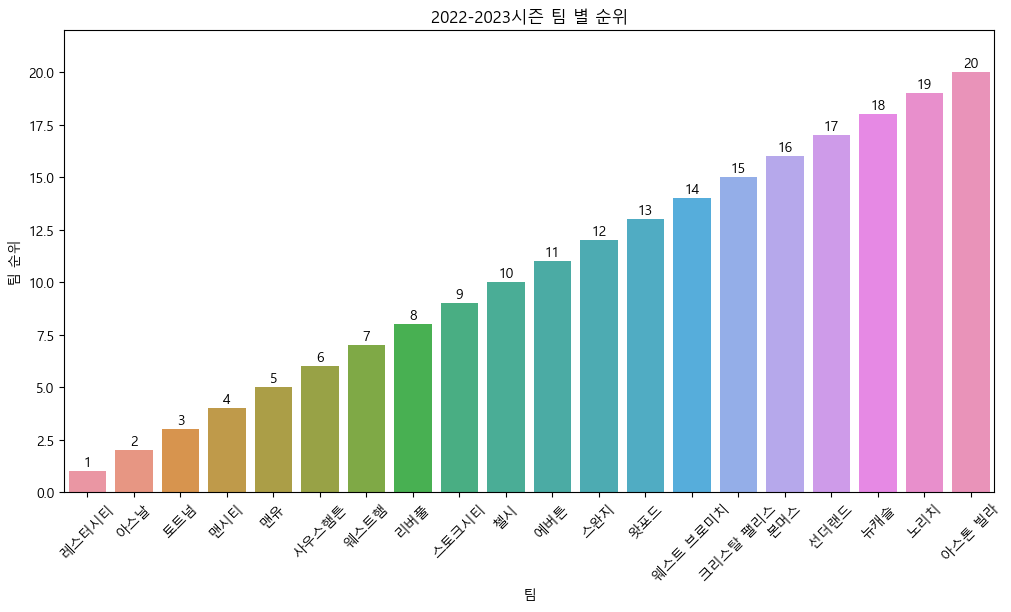

In [251]:
plt.figure(figsize=(12,6))
sns.barplot(x = epl_df_2017_AA['Team'],y =epl_df_2017_AA['Rank'])
plt.xticks(rotation = 45)
plt.ylim([22,0])
plt.gca().invert_yaxis() #축 변환해야 아래부터 그래프 나옴
# 그래프 위에 value 표시하기
for i, value in enumerate(epl_df_2017_AA['Rank']):
    plt.text(i, value + 0.1, value, ha='center', va='bottom')
plt.xlabel('팀',loc='center')
plt.ylabel('팀 순위',loc='center')
plt.title('2022-2023시즌 팀 별 순위',loc='center')
plt.show()

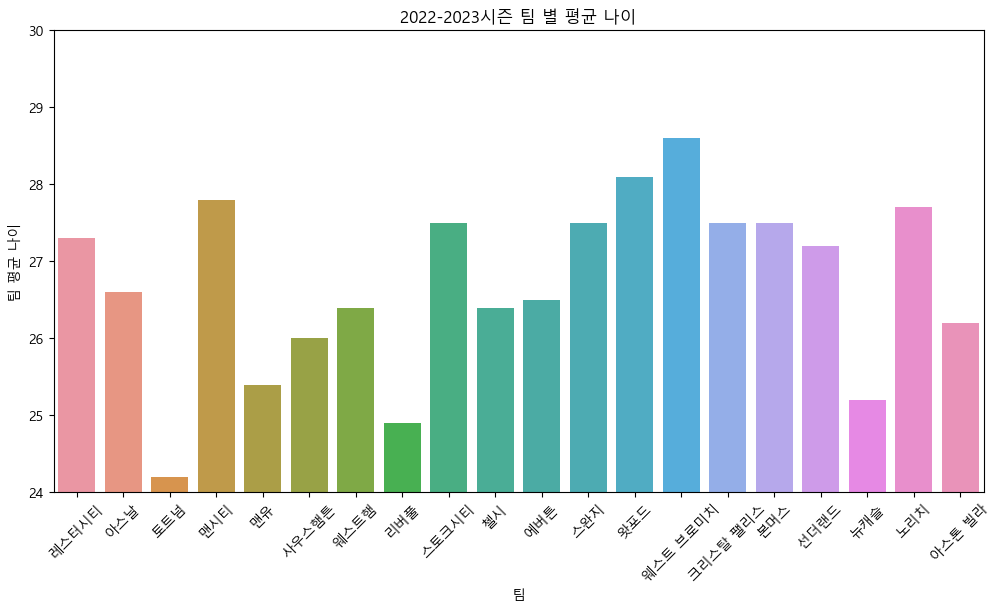

In [253]:
plt.figure(figsize=(12,6))
sns.barplot(x = epl_df_2017_AA['Team'],y =epl_df_2017_AA['AverageAge'])
plt.xticks(rotation=45)
plt.ylim(24,30)
plt.xlabel('팀',loc='center')
plt.ylabel('팀 평균 나이',loc='center')
plt.title('2022-2023시즌 팀 별 평균 나이',loc='center')
plt.show()

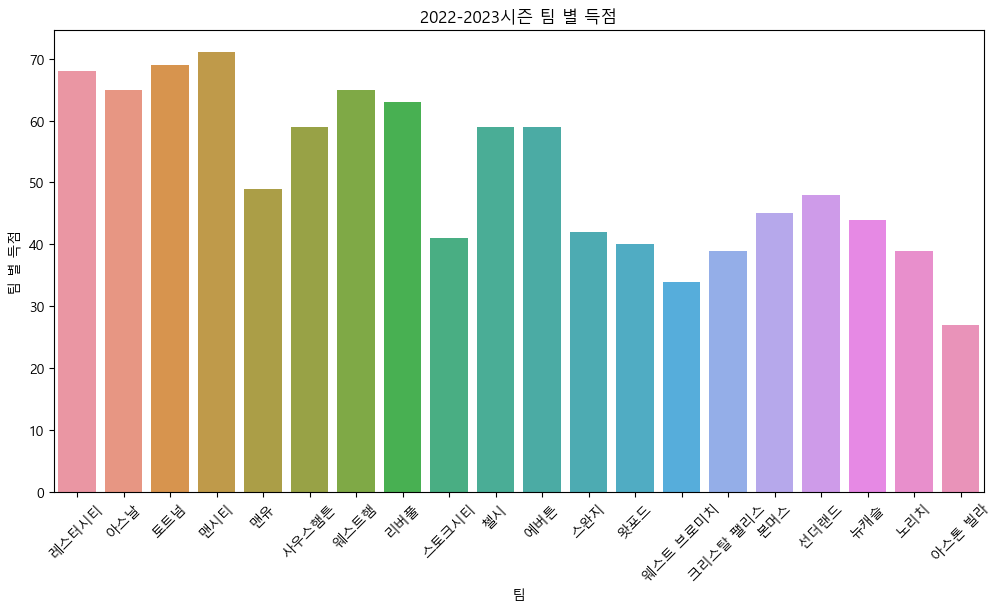

In [254]:
plt.figure(figsize=(12,6))
sns.barplot(x = epl_df_2017_AA['Team'],y =epl_df_2017_AA['Score'])
plt.xticks(rotation=45)
plt.xlabel('팀',loc='center')
plt.ylabel('팀 별 득점',loc='center')
plt.title('2022-2023시즌 팀 별 득점',loc='center')
plt.show()

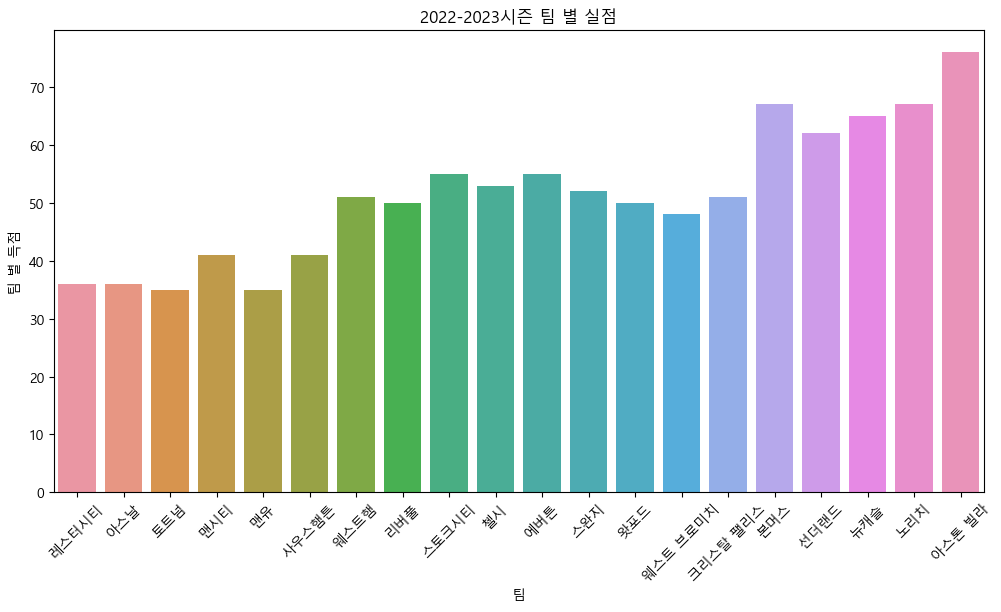

In [255]:
plt.figure(figsize=(12,6))
sns.barplot(x= epl_df_2017_AA['Team'],y =epl_df_2017_AA['Lose_score'])
plt.xticks(rotation=45)
plt.xlabel('팀',loc='center')
plt.ylabel('팀 별 득점',loc='center')
plt.title('2022-2023시즌 팀 별 실점',loc='center')
plt.show()

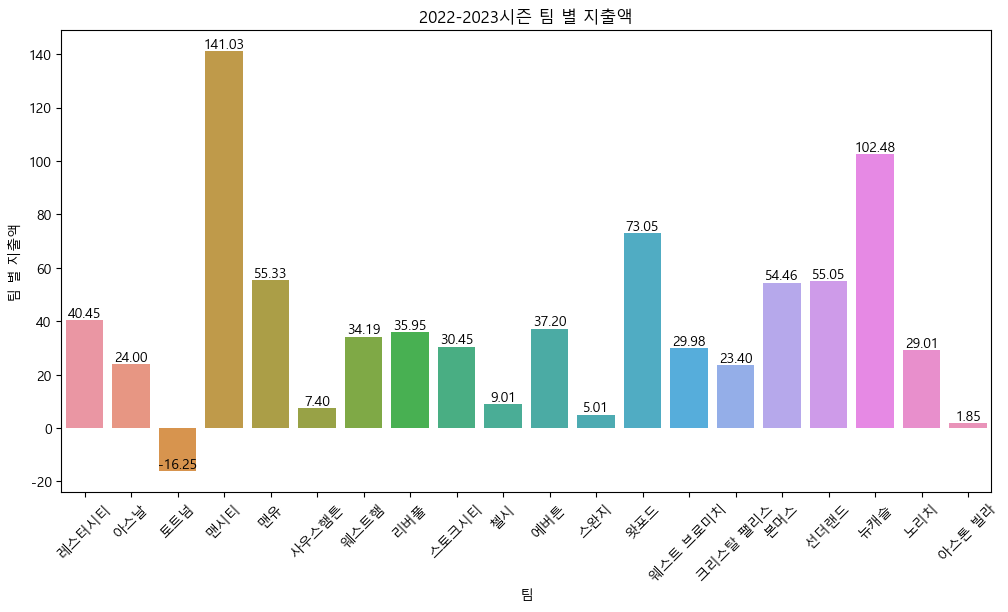

In [256]:
plt.figure(figsize=(12,6))
sns.barplot(x = epl_df_2017_AA['Team'],y = epl_df_2017_AA['Balance(m)'])
plt.xticks(rotation=45)
for i, value in enumerate(epl_df_2017_AA['Balance(m)']):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
plt.xlabel('팀',loc='center')
plt.ylabel('팀 별 지출액',loc='center')
plt.title('2022-2023시즌 팀 별 지출액',loc='center')
plt.show()

In [275]:
epl_df_2017_AA['Balance(m)'].mean()

38.652499999999996

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x = epl_df_2017_AA['Team'],y =epl_df_2017_AA['Score'])
plt.xticks(rotation=45)
plt.xlabel('팀',loc='center')
plt.ylabel('팀 별 득점',loc='center')
plt.title('2022-2023시즌 팀 별 득점',loc='center')
plt.show()

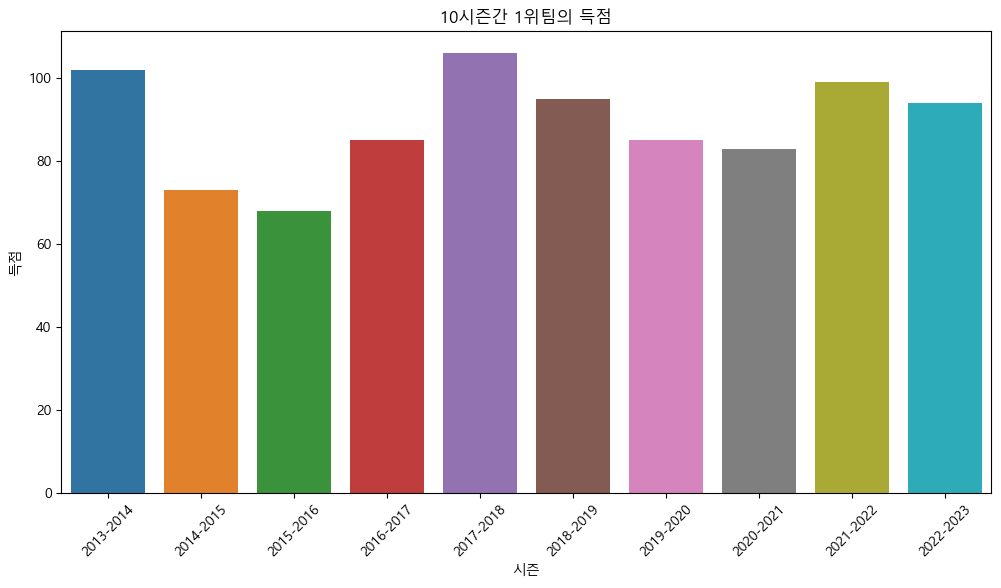

In [268]:
epl_df_lei = epl_df.loc[epl_df.Rank == 1]
epl_df_lei
plt.figure(figsize=(12,6))
sns.barplot(x = epl_df_lei['season'],y =epl_df_lei['Score'])
plt.xticks(rotation=45)
plt.xlabel('시즌',loc='center')
plt.ylabel('득점',loc='center')
plt.title('10시즌간 1위팀의 득점',loc='center')
plt.show()

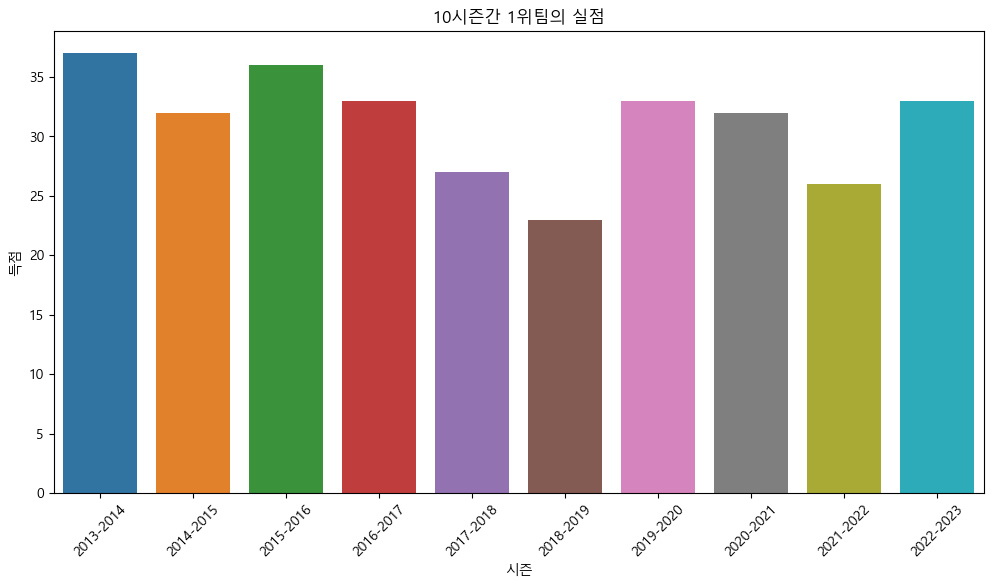

In [270]:
plt.figure(figsize=(12,6))
sns.barplot(x = epl_df_lei['season'],y =epl_df_lei['Lose_score'])
plt.xticks(rotation=45)
plt.xlabel('시즌',loc='center')
plt.ylabel('득점',loc='center')
plt.title('10시즌간 1위팀의 실점',loc='center')
plt.show()

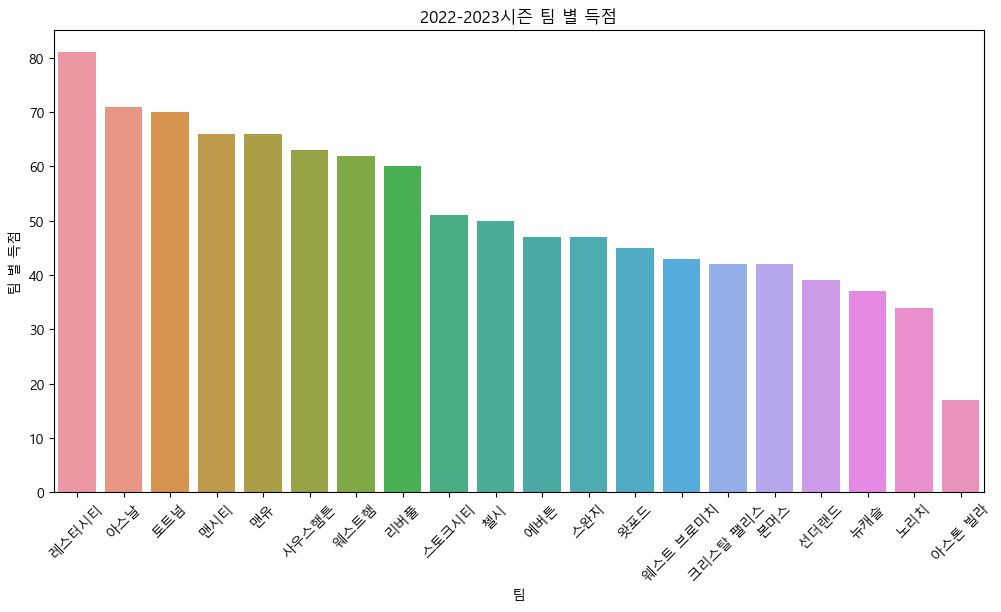

In [274]:
plt.figure(figsize=(12,6))
sns.barplot(x = epl_df_2017_AA['Team'],y =epl_df_2017_AA['Point'])
plt.xticks(rotation=45)
plt.xlabel('팀',loc='center')
plt.ylabel('팀 별 득점',loc='center')
plt.title('2022-2023시즌 팀 별 득점',loc='center')
plt.show()